In [333]:
## Customer churn prediction

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

from sklearn.ensemble import VotingClassifier

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:

In [67]:
data = pd.read_csv("/Users/iamve/Document/CustomerChurnprediction/CustomerChurnprediction/Book1.csv")
data.head()

customerID  age  gender        Contract  MonthlyCharges TotalCharges  \
0  7590-VHVEG   26  Female  Month-to-month           29.85        29.85   
1  5575-GNVDE   27    Male        One year           56.95       1889.5   
2  3668-QPYBK   19    Male  Month-to-month           53.85       108.15   
3  7795-CFOCW   27    Male        One year           42.30      1840.75   
4  9237-HQITU   22  Female  Month-to-month           70.70       151.65   

  TechSupport InternetService  tenure PaperlessBilling  \
0          No             DSL       1              Yes   
1          No             DSL      34               No   
2          No             DSL       2              Yes   
3         Yes             DSL      45               No   
4          No     Fiber optic       2              Yes   

               PaymentMethod Churn  
0           Electronic check    No  
1               Mailed check    No  
2               Mailed check   Yes  
3  Bank transfer (automatic)    No  
4           Electronic check   Yes

In [69]:
data.isnull().any().any()

False

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   age               7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   tenure            7043 non-null   int64  
 9   PaperlessBilling  7043 non-null   object 
 10  PaymentMethod     7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 660.4+ KB


In [73]:
data.shape

(7043, 12)

### Visualize missing values

<Axes: >

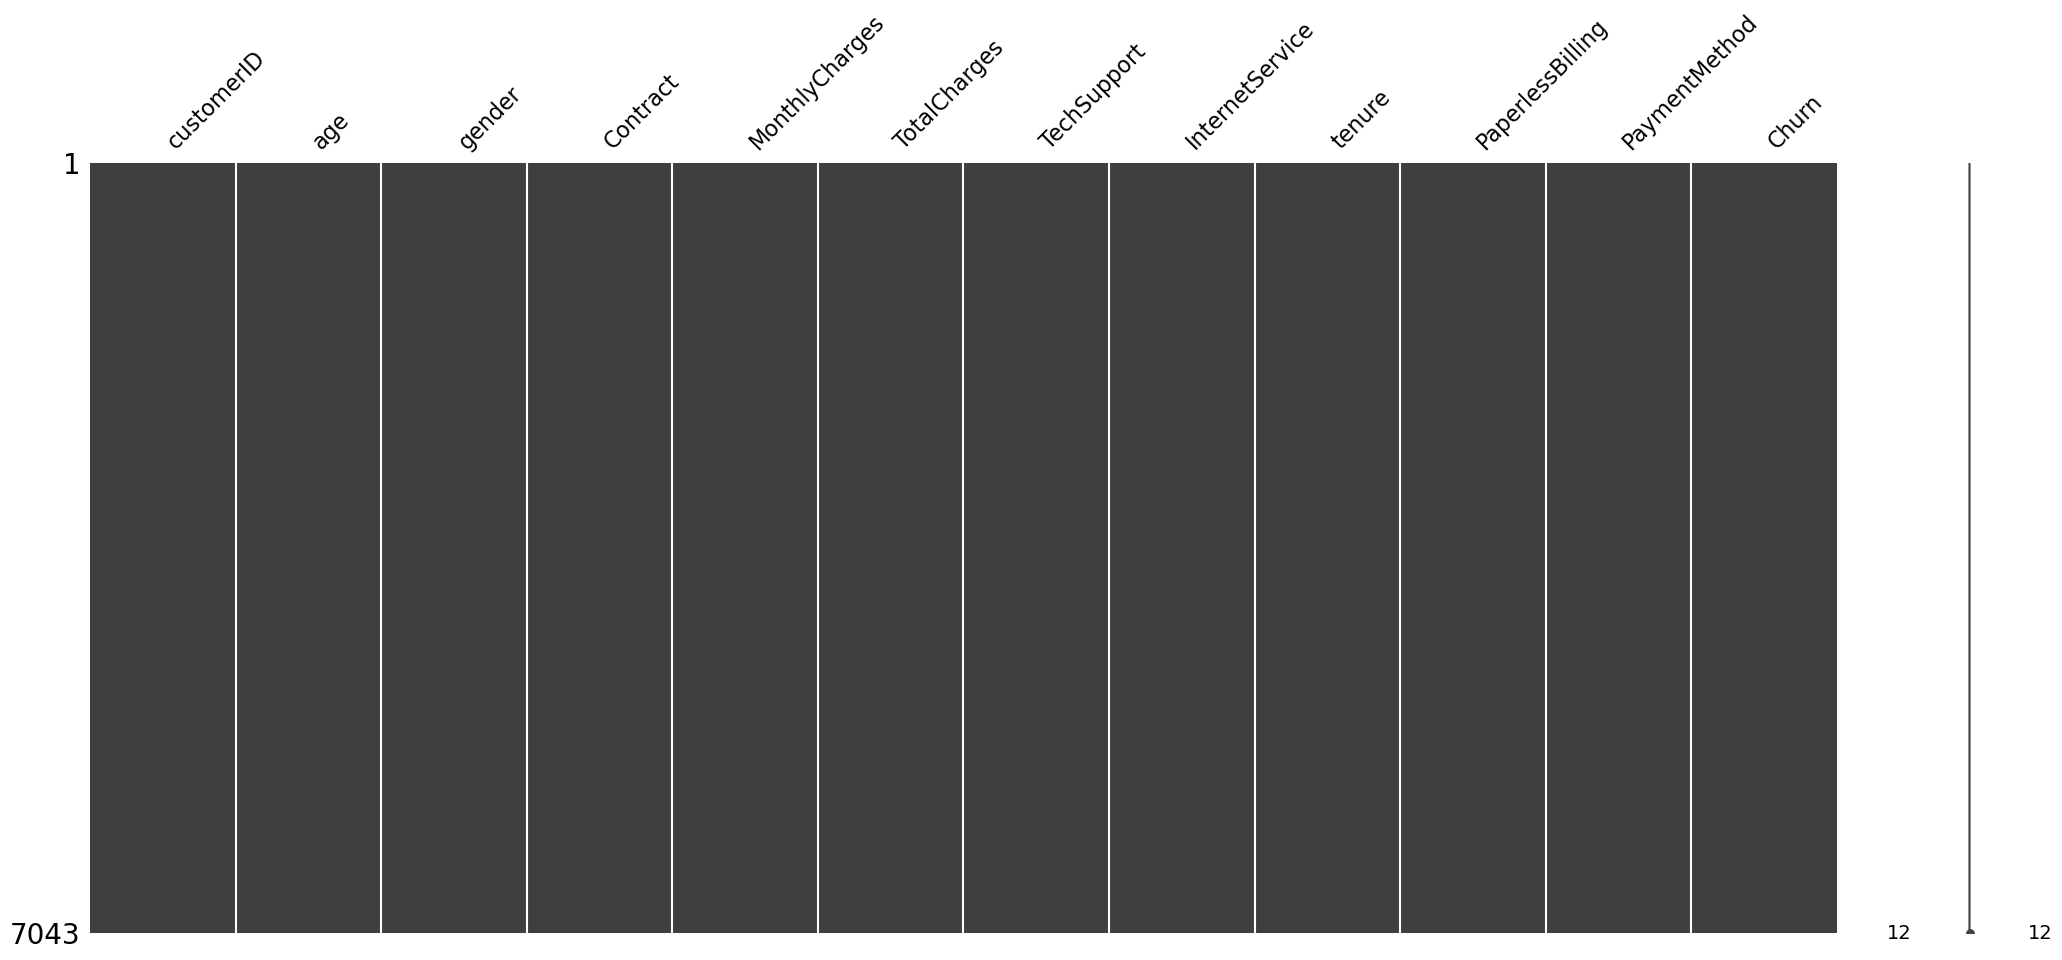

In [82]:
import missingno as msno
msno.matrix(data)


In [84]:
data = data.drop(["customerID"], axis = 1)
data.head()

age  gender        Contract  MonthlyCharges TotalCharges TechSupport  \
0   26  Female  Month-to-month           29.85        29.85          No   
1   27    Male        One year           56.95       1889.5          No   
2   19    Male  Month-to-month           53.85       108.15          No   
3   27    Male        One year           42.30      1840.75         Yes   
4   22  Female  Month-to-month           70.70       151.65          No   

  InternetService  tenure PaperlessBilling              PaymentMethod Churn  
0             DSL       1              Yes           Electronic check    No  
1             DSL      34               No               Mailed check    No  
2             DSL       2              Yes               Mailed check   Yes  
3             DSL      45               No  Bank transfer (automatic)    No  
4     Fiber optic       2              Yes           Electronic check   Yes

In [86]:
data[data["TotalCharges"] == ' ']


age  gender  Contract  MonthlyCharges TotalCharges          TechSupport  \
488    27  Female  Two year           52.55                               Yes   
753    29    Male  Two year           20.25               No internet service   
936    25  Female  Two year           80.85                                No   
1082   30    Male  Two year           25.75               No internet service   
1340   19  Female  Two year           56.05                               Yes   
3331   20    Male  Two year           19.85               No internet service   
3826   26    Male  Two year           25.35               No internet service   
4380   30  Female  Two year           20.00               No internet service   
5218   30    Male  One year           19.70               No internet service   
6670   26  Female  Two year           73.35                               Yes   
6754   25    Male  Two year           61.90                               Yes   

     InternetService  tenure PaperlessBilling              PaymentMethod Churn  
488              DSL       0              Yes  Bank transfer (automatic)    No  
753               No       0               No               Mailed check    No  
936              DSL       0               No               Mailed check    No  
1082              No       0               No               Mailed check    No  
1340             DSL       0               No    Credit card (automatic)    No  
3331              No       0               No               Mailed check    No  
3826              No       0               No               Mailed check    No  
4380              No       0               No               Mailed check    No  
5218              No       0              Yes               Mailed check    No  
6670             DSL       0               No               Mailed check    No  
6754             DSL       0              Yes  Bank transfer (automatic)    No

In [90]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

age                  0
gender               0
Contract             0
MonthlyCharges       0
TotalCharges        11
TechSupport          0
InternetService      0
tenure               0
PaperlessBilling     0
PaymentMethod        0
Churn                0
dtype: int64

### There are 11 records with missing Total charges

In [93]:
data[data["tenure"] == 0]

age  gender  Contract  MonthlyCharges  TotalCharges  \
488    27  Female  Two year           52.55           NaN   
753    29    Male  Two year           20.25           NaN   
936    25  Female  Two year           80.85           NaN   
1082   30    Male  Two year           25.75           NaN   
1340   19  Female  Two year           56.05           NaN   
3331   20    Male  Two year           19.85           NaN   
3826   26    Male  Two year           25.35           NaN   
4380   30  Female  Two year           20.00           NaN   
5218   30    Male  One year           19.70           NaN   
6670   26  Female  Two year           73.35           NaN   
6754   25    Male  Two year           61.90           NaN   

              TechSupport InternetService  tenure PaperlessBilling  \
488                   Yes             DSL       0              Yes   
753   No internet service              No       0               No   
936                    No             DSL       0               No   
1082  No internet service              No       0               No   
1340                  Yes             DSL       0               No   
3331  No internet service              No       0               No   
3826  No internet service              No       0               No   
4380  No internet service              No       0               No   
5218  No internet service              No       0              Yes   
6670                  Yes             DSL       0               No   
6754                  Yes             DSL       0              Yes   

                  PaymentMethod Churn  
488   Bank transfer (automatic)    No  
753                Mailed check    No  
936                Mailed check    No  
1082               Mailed check    No  
1340    Credit card (automatic)    No  
3331               Mailed check    No  
3826               Mailed check    No  
4380               Mailed check    No  
5218               Mailed check    No  
6670               Mailed check    No  
6754  Bank transfer (automatic)    No

In [95]:
data.drop(labels=data[data["tenure"] == 0].index, axis = 0, inplace = True)

In [99]:
data.fillna(data["TotalCharges"].mean())


age  gender        Contract  MonthlyCharges  TotalCharges TechSupport  \
0      26  Female  Month-to-month           29.85         29.85          No   
1      27    Male        One year           56.95       1889.50          No   
2      19    Male  Month-to-month           53.85        108.15          No   
3      27    Male        One year           42.30       1840.75         Yes   
4      22  Female  Month-to-month           70.70        151.65          No   
...   ...     ...             ...             ...           ...         ...   
7038   21    Male        One year           84.80       1990.50         Yes   
7039   26  Female        One year          103.20       7362.90          No   
7040   30  Female  Month-to-month           29.60        346.45          No   
7041   22    Male  Month-to-month           74.40        306.60          No   
7042   30    Male        Two year          105.65       6844.50         Yes   

     InternetService  tenure PaperlessBilling              PaymentMethod Churn  
0                DSL       1              Yes           Electronic check    No  
1                DSL      34               No               Mailed check    No  
2                DSL       2              Yes               Mailed check   Yes  
3                DSL      45               No  Bank transfer (automatic)    No  
4        Fiber optic       2              Yes           Electronic check   Yes  
...              ...     ...              ...                        ...   ...  
7038             DSL      24              Yes               Mailed check    No  
7039     Fiber optic      72              Yes    Credit card (automatic)    No  
7040             DSL      11              Yes           Electronic check    No  
7041     Fiber optic       4              Yes               Mailed check   Yes  
7042     Fiber optic      66              Yes  Bank transfer (automatic)    No  

[7032 rows x 11 columns]

In [103]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

age                 0
gender              0
Contract            0
MonthlyCharges      0
TotalCharges        0
TechSupport         0
InternetService     0
tenure              0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [105]:
data.InternetService.describe(include=["object", "bool"])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

## EDA

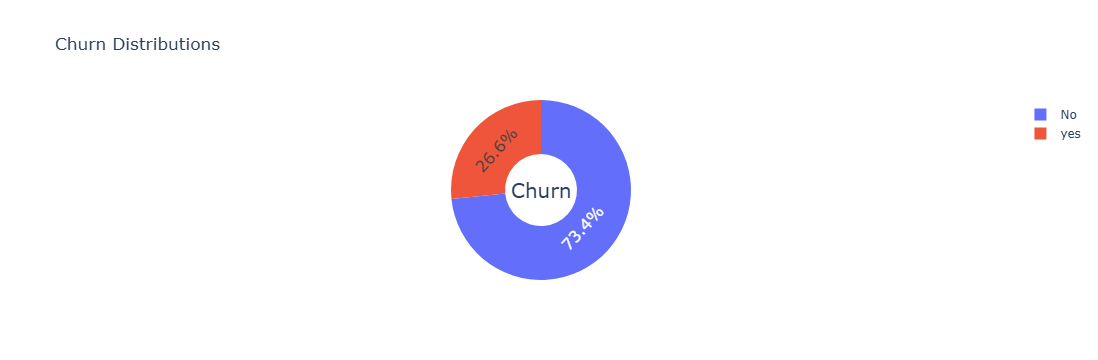

In [108]:
type_ = ["No", "yes"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=data['Churn'].value_counts(), name="Churn"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Churn', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [110]:
data.Churn[data.Churn == "No"].groupby(by = data.gender).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [112]:
data.Churn[data.Churn == "Yes"].groupby(by = data.gender).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

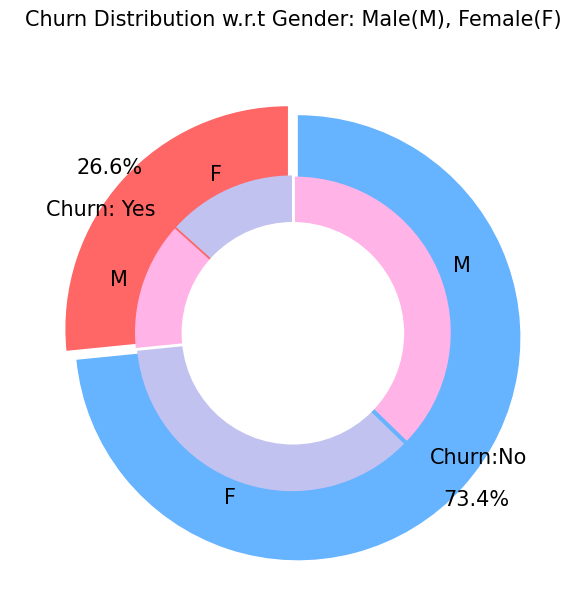

In [114]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

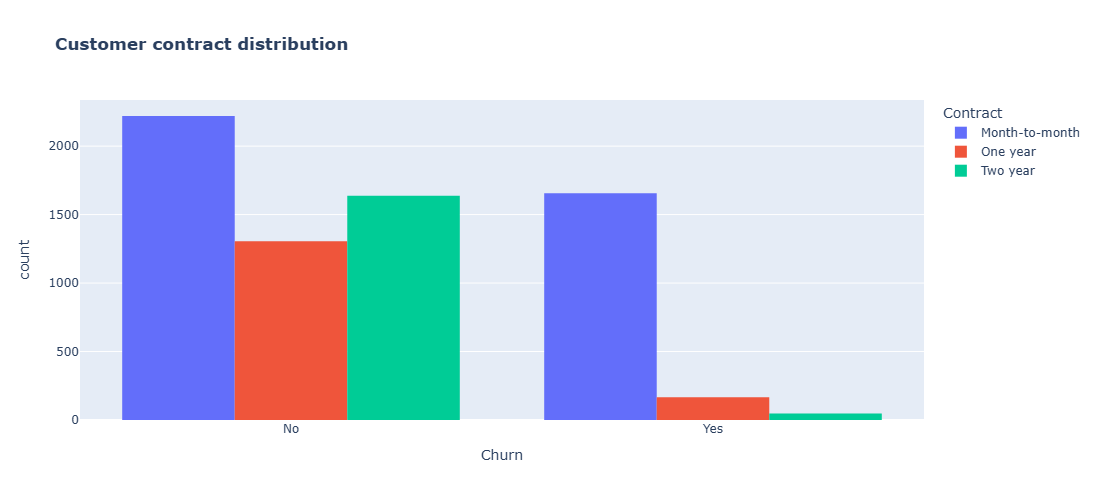

In [116]:
fig = px.histogram(data, x="Churn", color = "Contract", barmode = "group", title = "<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.2)
fig.show()

#### Customers with monthly contract are more likely to churn

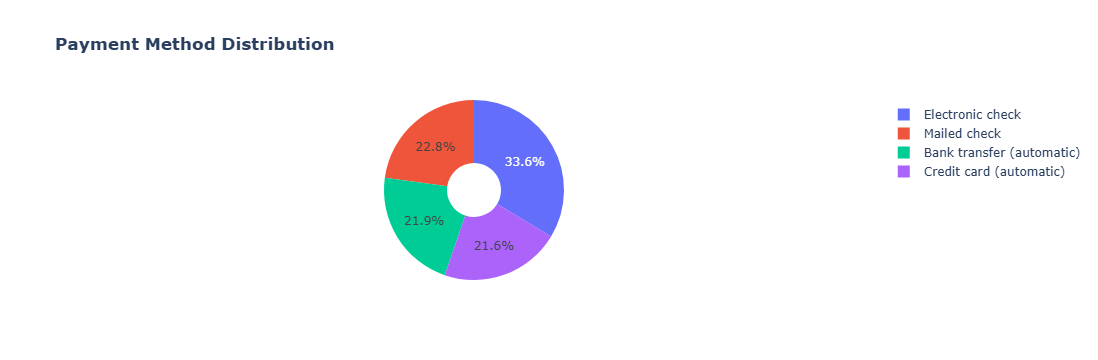

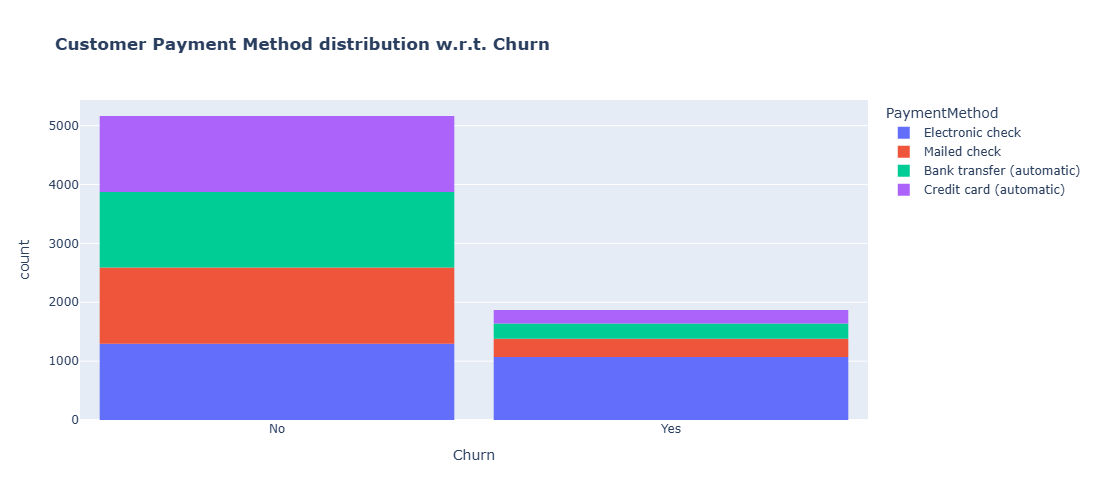

In [119]:
labels = data['PaymentMethod'].unique()
values = data['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

fig = px.histogram(data, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [121]:
 data[data["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [123]:
data[data["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64

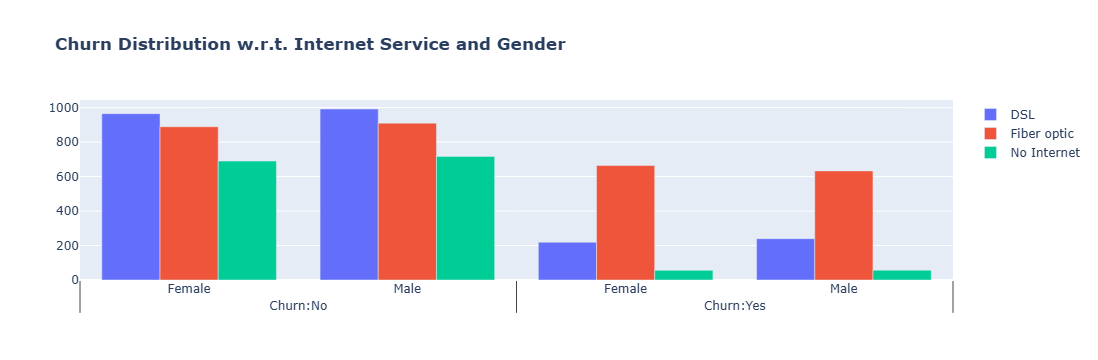

In [125]:

fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

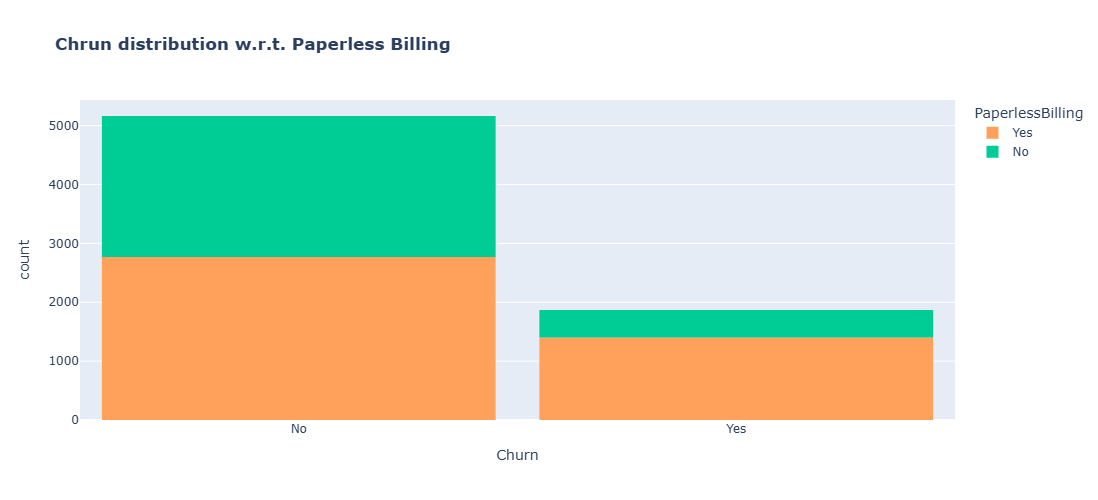

In [133]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(data, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

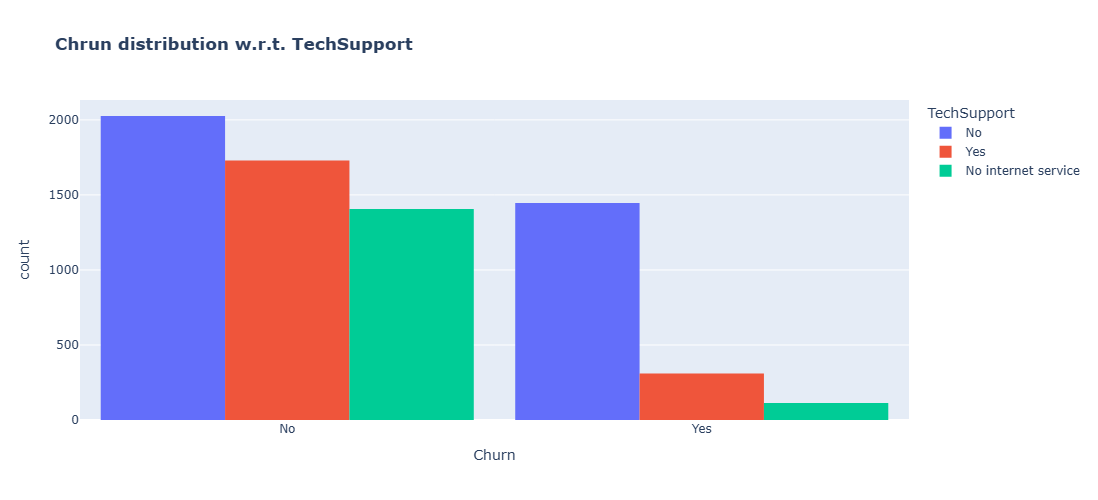

In [137]:
fig = px.histogram(data, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

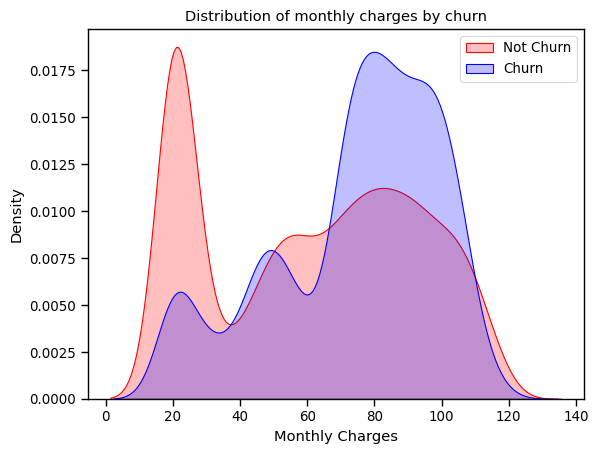

In [139]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

### Customers with higher monthly charges are more likely to churn

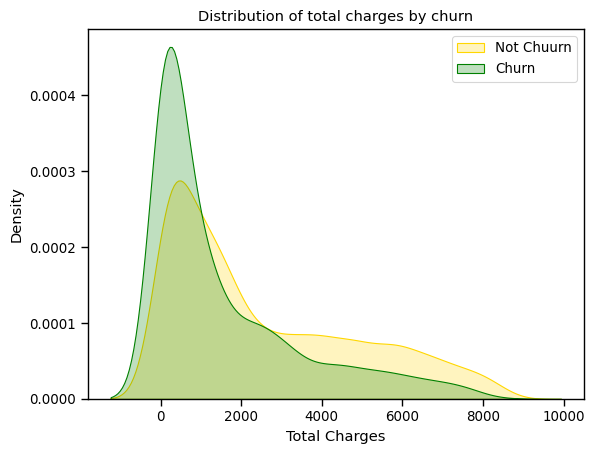

In [142]:
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chuurn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

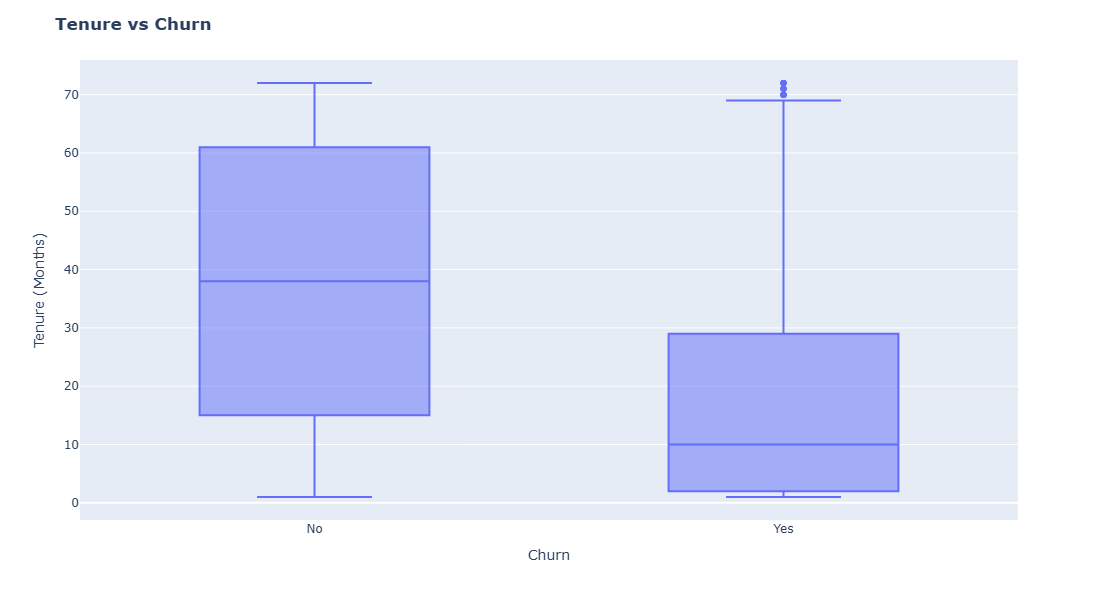

In [144]:
fig = px.box(data, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

New customers are more likely to churn

In [147]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))



3 columns were label encoded.


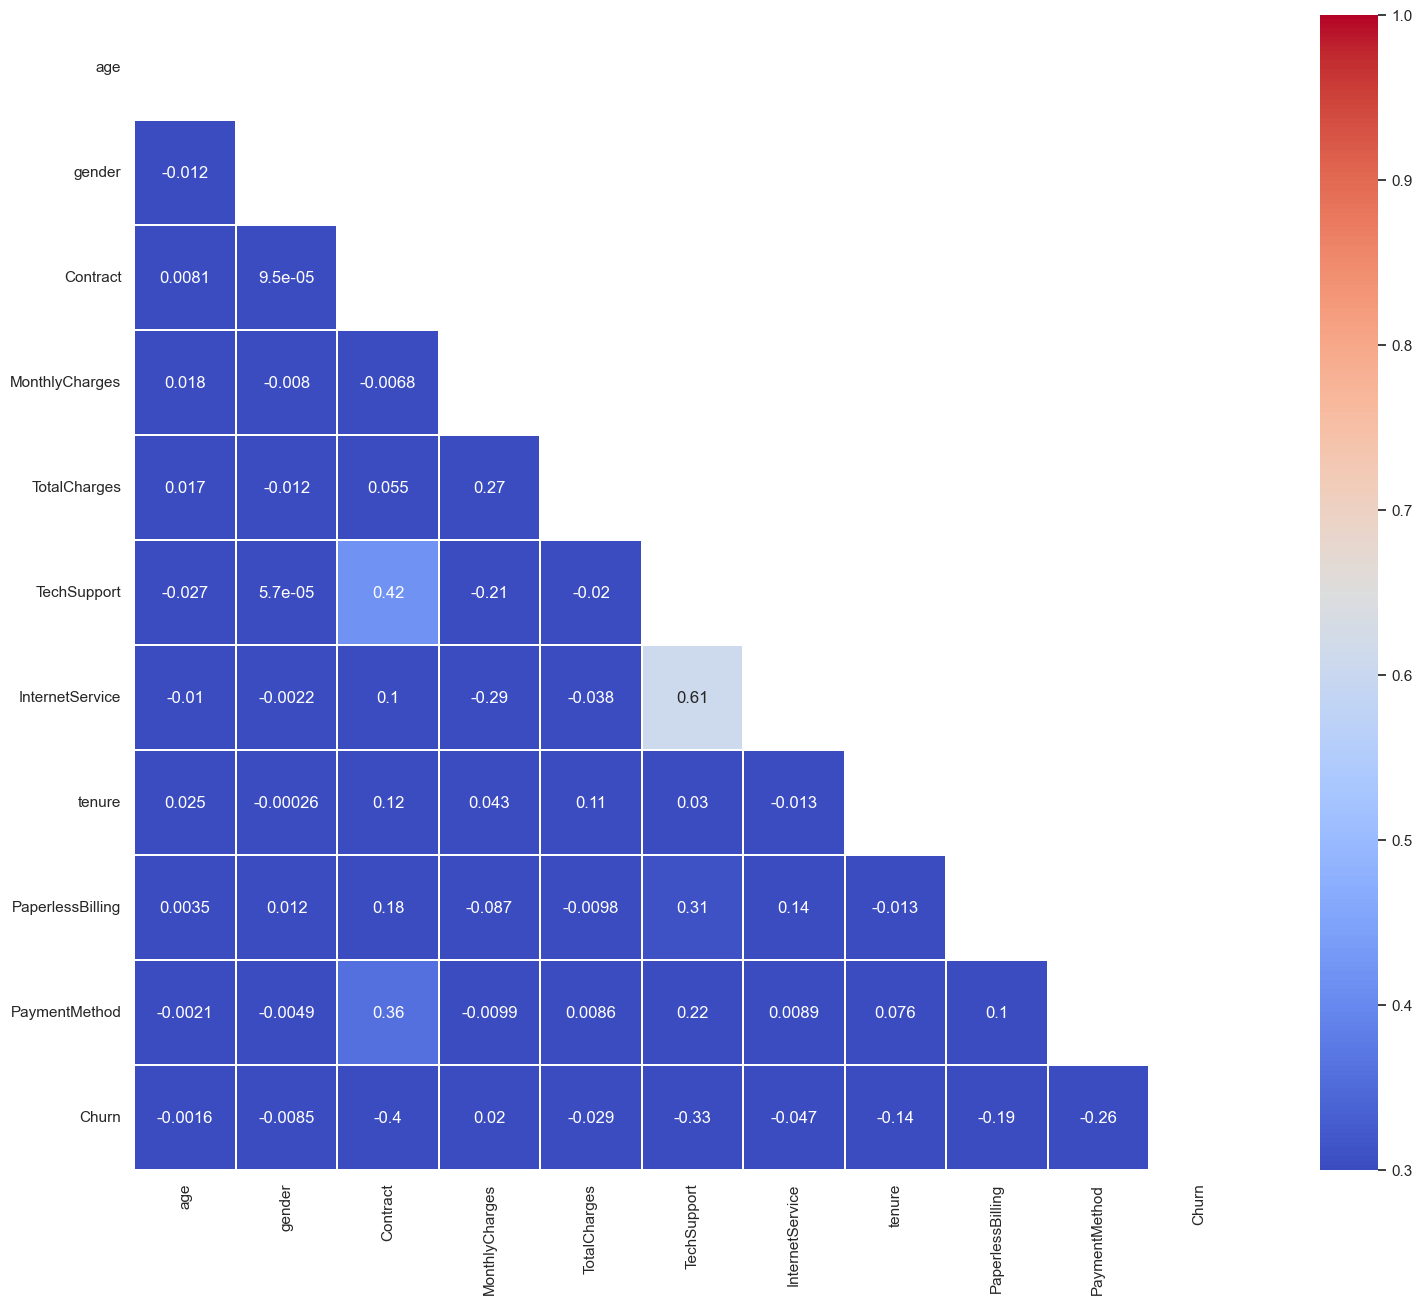

In [151]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
plt.figure(figsize=(18, 15))

corr = data.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

### Multicollinearity check using VIF

#TODO:
from statsmodels.stats.outliers_influence import variance_inflation_factor
data_ = pd.read_csv("data.csv")
X = data_[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

In [159]:
def encode_data(dataframe):
    if dataframe.dtype == "object":
        dataframe = LabelEncoder().fit_transform(dataframe)
    return dataframe

data = data.apply(lambda x: encode_data(x))
data.head()

age  gender  Contract  MonthlyCharges  TotalCharges  TechSupport  \
0   26       0         0           29.85         29.85            0   
1   27       1         1           56.95       1889.50            0   
2   19       1         0           53.85        108.15            0   
3   27       1         1           42.30       1840.75            2   
4   22       0         0           70.70        151.65            0   

   InternetService  tenure  PaperlessBilling  PaymentMethod  Churn  
0                0       1                 1              2      0  
1                0      34                 0              3      0  
2                0       2                 1              3      1  
3                0      45                 0              0      0  
4                1       2                 1              2      1

In [161]:
X = data.drop(columns = "Churn")
y = data["Churn"].values

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4, stratify =y)

In [165]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

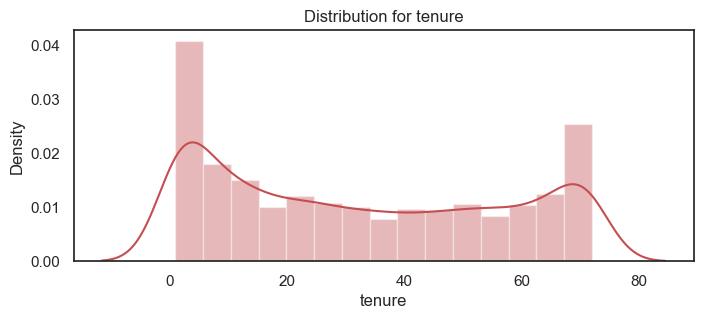

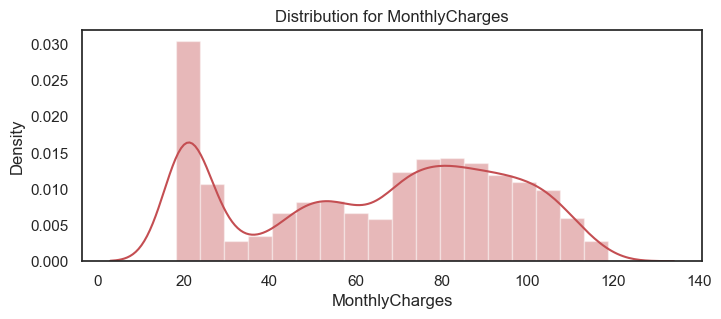

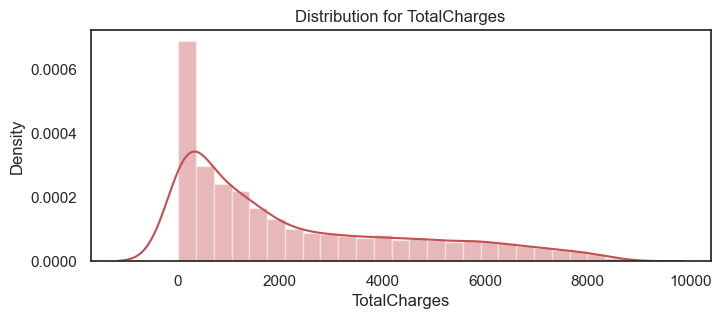

In [167]:
col =  ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col :distplot(features, data)

The features need standard scaling as all of them are distributed over different range values 

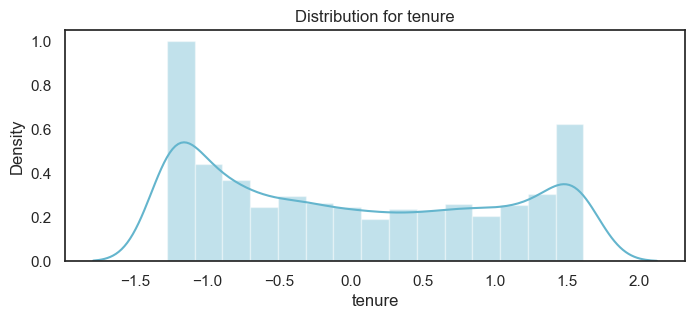

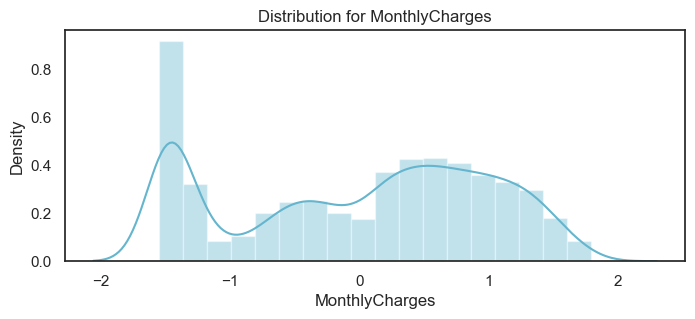

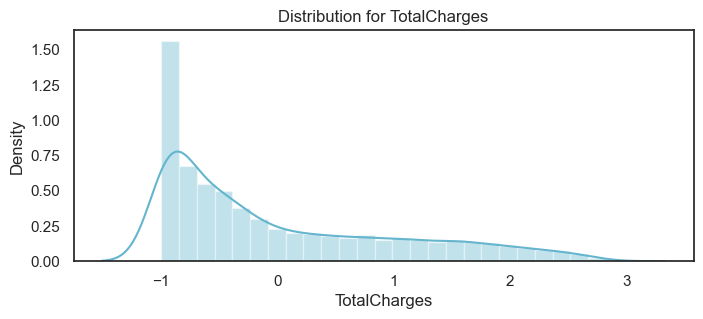

In [170]:
data_std = pd.DataFrame(StandardScaler().fit_transform(data[col]).astype('float64'), columns = col)
for feat in col: distplot(feat, data_std, color='c')

In [172]:
data.columns

Index(['age', 'gender', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'TechSupport', 'InternetService', 'tenure', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')

In [180]:
for i in data.columns:
    print(i, ": ", data[i].unique())

age :  [26 27 19 22 20 30 29 23 21 25 28 24]
gender :  [0 1]
Contract :  [0 1 2]
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
TechSupport :  [0 2 1]
InternetService :  [0 1 2]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PaperlessBilling :  [1 0]
PaymentMethod :  [2 3 0 1]
Churn :  [0 1]


In [182]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(col) - set(cat_cols_ohe)) #those that need label encoding

print(cat_cols_le)

['PaperlessBilling', 'age', 'TechSupport', 'gender']


In [319]:
scaler = StandardScaler()
X_train[col] = StandardScaler().fit_transform(X_train[col])
X_test[col] = StandardScaler().fit_transform(X_test[col])

In [323]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
models.append(("Voting Classifier",  VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), 
                                                                  ('lr', LogisticRegression()), ('abc',  AdaBoostClassifier())], voting='soft')))

## Evaluating the model Results

In [326]:
score_array = []

for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))

score_array

[0.7270142180094786,
 0.752132701421801,
 0.7497630331753554,
 0.7691943127962085,
 0.7654028436018957,
 0.7744075829383886,
 0.7772511848341233,
 0.7829383886255924,
 0.7805687203791469,
 0.7819905213270142,
 0.7829383886255924,
 0.7815165876777251,
 0.7834123222748816,
 0.7848341232227488,
 0.7843601895734598,
 0.7890995260663507,
 0.7838862559241706,
 0.7919431279620853,
 0.7881516587677725,
 0.7924170616113744,
 0.7919431279620853,
 0.7938388625592417,
 0.7914691943127962,
 0.790521327014218]

## KNN

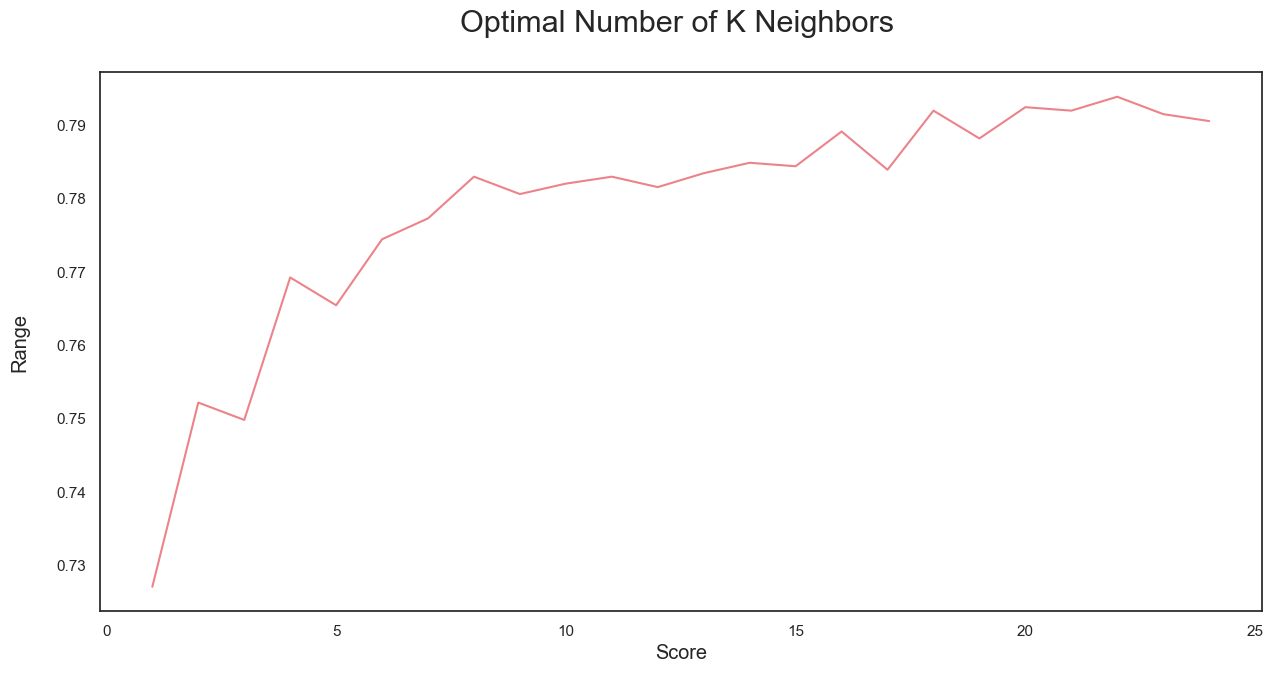

In [203]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

## Random Forest

In [210]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
    


In [212]:
for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.7492890995260664
2 : 0.7672985781990521
3 : 0.7568720379146919
4 : 0.7739336492890996
5 : 0.7630331753554502
6 : 0.771090047393365
7 : 0.7744075829383886
8 : 0.7796208530805687
9 : 0.7786729857819905
10 : 0.7834123222748816
11 : 0.7796208530805687
12 : 0.7848341232227488
13 : 0.7786729857819905
14 : 0.7819905213270142
15 : 0.7786729857819905
16 : 0.7815165876777251
17 : 0.7800947867298578
18 : 0.7815165876777251
19 : 0.7843601895734598
20 : 0.7829383886255924
21 : 0.7819905213270142
22 : 0.7796208530805687
23 : 0.7777251184834123
24 : 0.7805687203791469
25 : 0.7772511848341233
26 : 0.7824644549763033
27 : 0.7786729857819905
28 : 0.7786729857819905
29 : 0.7777251184834123
30 : 0.7815165876777251
31 : 0.7791469194312797
32 : 0.7796208530805687
33 : 0.7781990521327015
34 : 0.7772511848341233
35 : 0.7781990521327015
36 : 0.776303317535545
37 : 0.7767772511848341
38 : 0.7772511848341233
39 : 0.7800947867298578
40 : 0.7796208530805687
41 : 0.7791469194312797
42 : 0.7781990521327015
43 

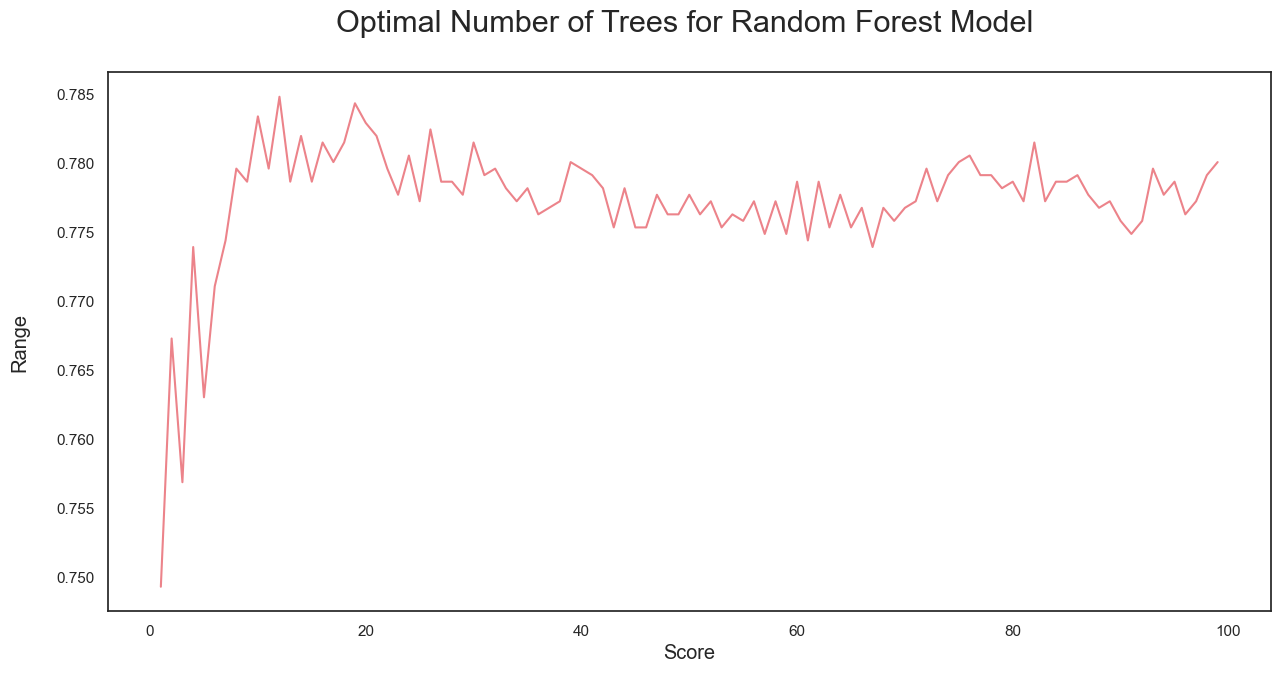

In [214]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22",
          fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

## 2nd Iteration

In [304]:
#evaluation of results
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [306]:
# Logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#SVC

classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

#knn

classifier3 = KNeighborsClassifier(n_neighbors=22, metric="minkowski", p=2)
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)


#Kernel SVM
classifier4 = SVC(kernel="rbf", random_state =0)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)


#Naive Bayes
classifier5 = GaussianNB()
classifier5.fit(X_train, y_train)
y_pred5 = classifier5.predict(X_test)

#Decision tree
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier6.fit(X_train, y_train)
y_pred6 = classifier6.predict(X_test)

#Random Forest

classifier7 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier7.fit(X_train, y_train)
y_pred7 = classifier7.predict(X_test)

#Adaboost
classifier8 = AdaBoostClassifier()
classifier8.fit(X_train, y_train)
y_pred8 = classifier8.predict(X_test)

#Gradient Boost
classifier9 = GradientBoostingClassifier()


classifier9.fit(X_train, y_train)
y_pred9 = classifier9.predict(X_test)





#Voting Classifier

classifier10 = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()),
                                            ('abc', AdaBoostClassifier())], voting='soft')



classifier10.fit(X_train, y_train)
y_pred10 = classifier10.predict(X_test)

In [307]:
lr = model_evaluation(y_test, y_pred, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
knn = model_evaluation(y_test, y_pred3, "K-Nearest Neighbours")
k_svm = model_evaluation(y_test, y_pred4, "Kernel SVM")
nb = model_evaluation(y_test, y_pred5, "Naive Bayes")
dt = model_evaluation(y_test, y_pred6, "Decision Tree")
rf = model_evaluation(y_test, y_pred7, "Random Forest")
ab = model_evaluation(y_test, y_pred8, "Adaboost")
gb = model_evaluation(y_test, y_pred9, "Gradient Boost")
vc = model_evaluation(y_test, y_pred10, "Voting Classifier")

<b>k-Fold Cross-Validation</b>: Model evaluation is most commonly done through ‘K- fold Cross-Validation’ technique that primarily helps us to fix the variance. Variance problem occurs when we get good accuracy while running the model on a training set and a test set but then the accuracy looks different when the model is run on another test set.
So, in order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

In [311]:
#TODO: Model Evaluation

In [313]:
def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,
                            X=X_train, y=y_train, cv =10)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

In [315]:
k_fold_cross_validation(classifier8, "Adaboost")


Adaboost accuracy: 0.79 (+/- 0.03)


In [244]:
k_fold_cross_validation(classifier10, "Voting classifier")

Voting classifier accuracy: 0.80 (+/- 0.03)


In [245]:
k_fold_cross_validation(classifier9, "Gradient Boost classifier")

Gradient Boost classifier accuracy: 0.80 (+/- 0.03)


In [246]:
k_fold_cross_validation(classifier, "Logistic regression")

Logistic regression accuracy: 0.79 (+/- 0.04)


In [247]:
k_fold_cross_validation(classifier4, "Kernel SVM")

Kernel SVM accuracy: 0.78 (+/- 0.02)


In [249]:
# ROC Curve

def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_train, y_train) 
    probs = classifier_.predict_proba(X_test) 
    probs = probs[:, 1] 
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(14, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    # Plot Adaboost ROC
    plt.plot(rf_fpr, rf_tpr, 
    label=label_)
    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium", 
    fontfamily = "sans-serif")

    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium", 
    fontfamily = "sans-serif")

    plt.title('ROC Graph \n',horizontalalignment="center", 
    fontstyle = "normal", fontsize = "22", 
    fontfamily = "sans-serif")

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()
    
  

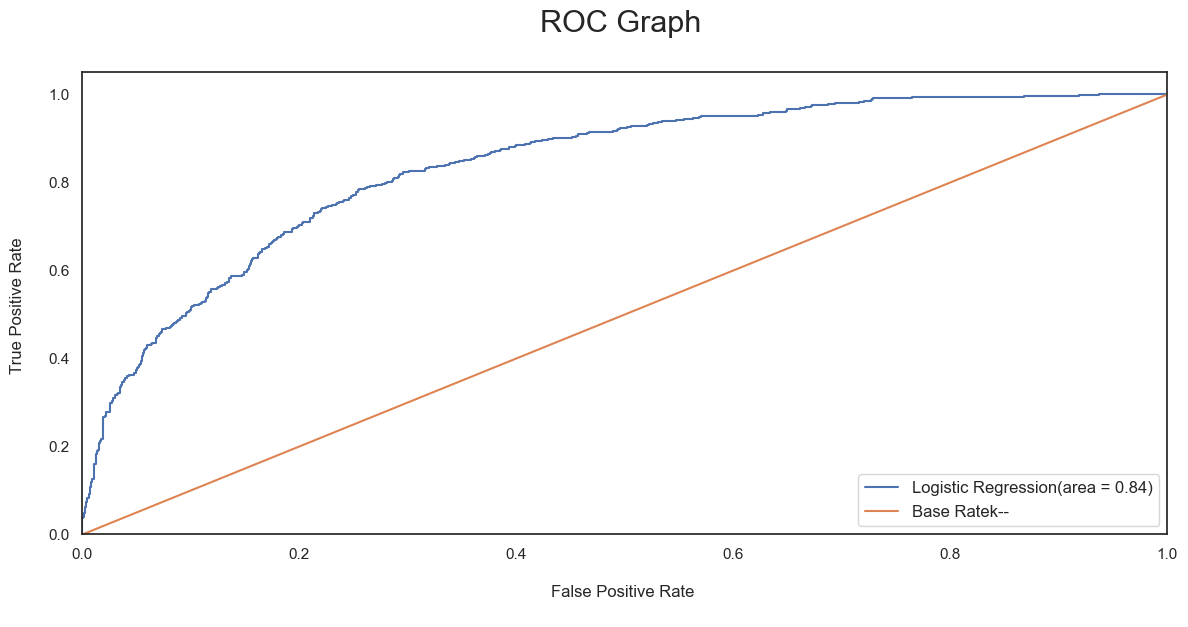

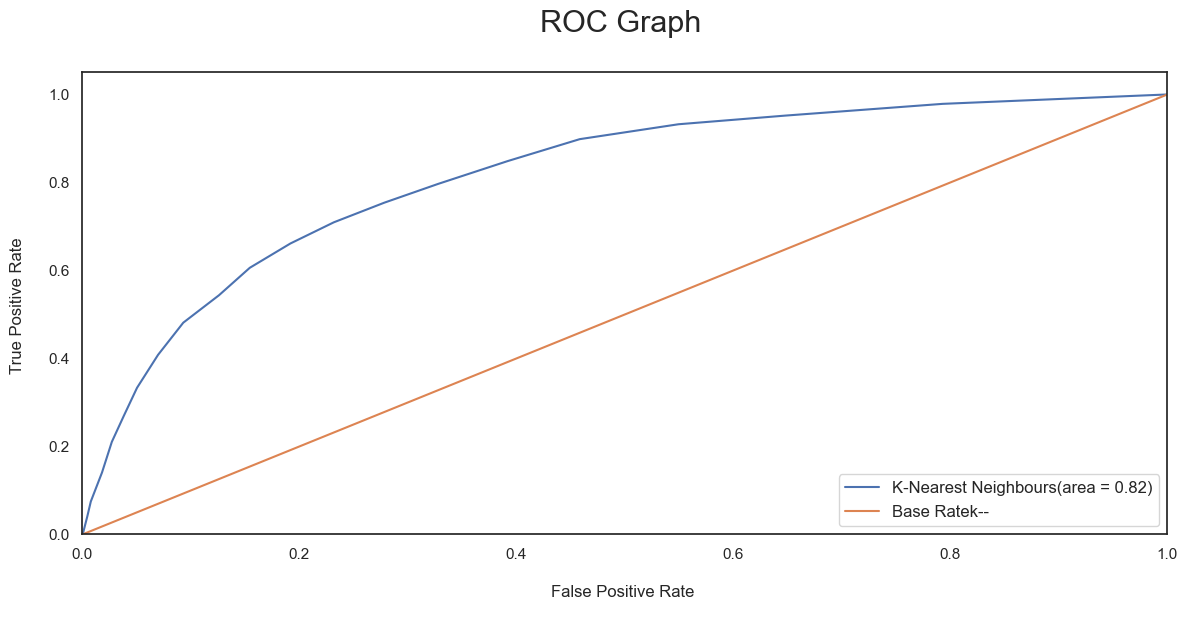

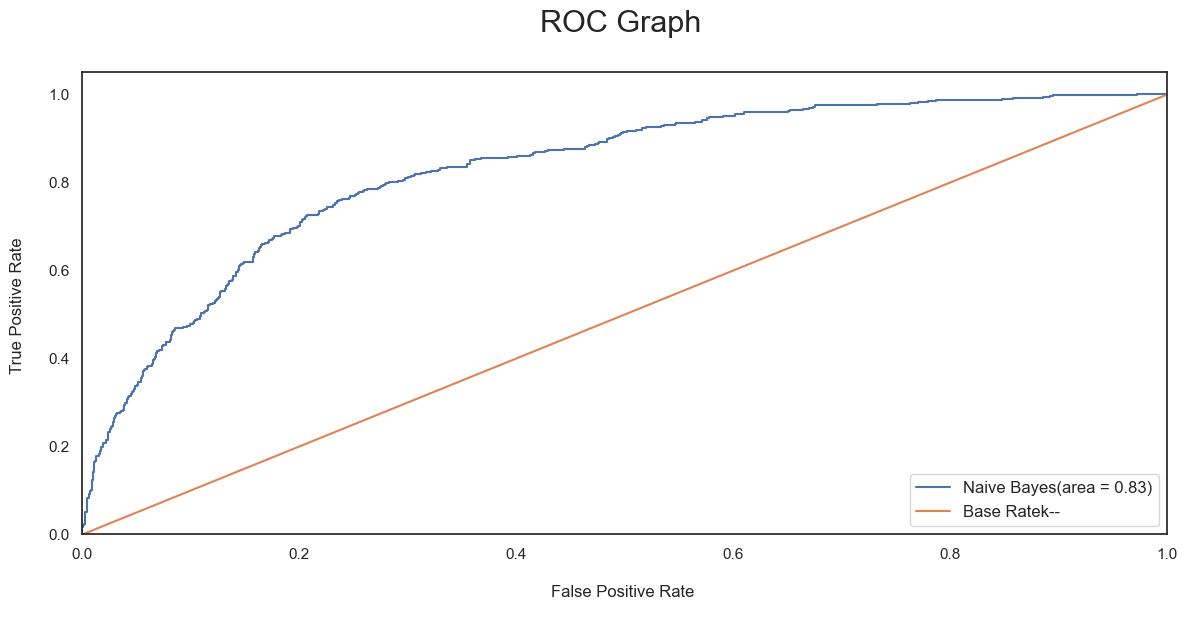

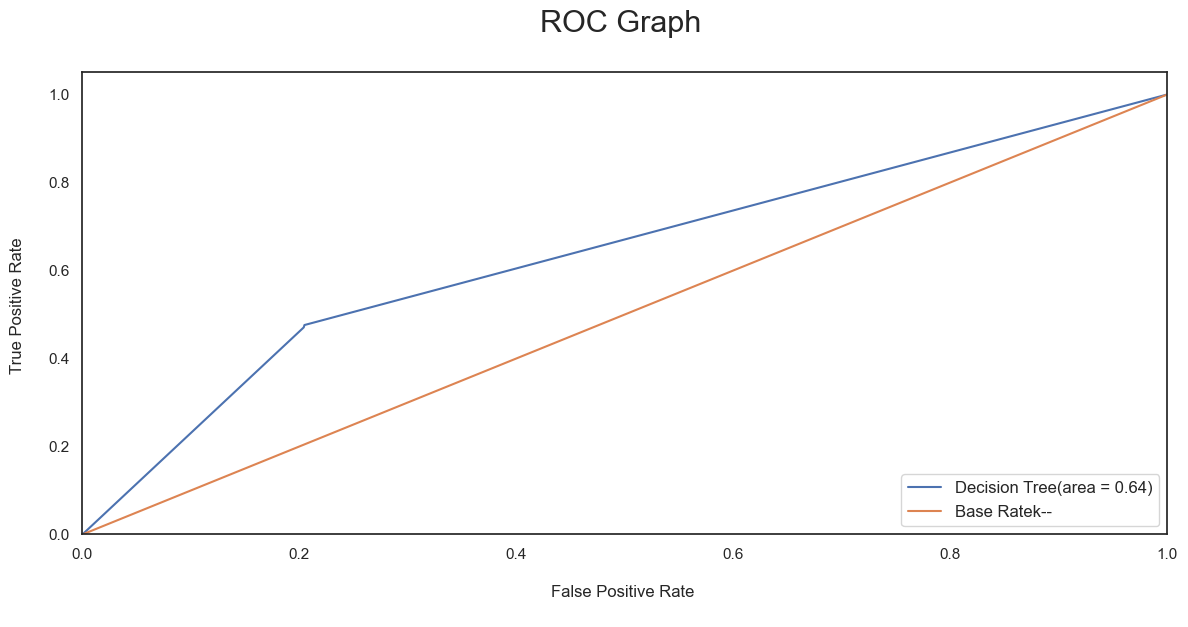

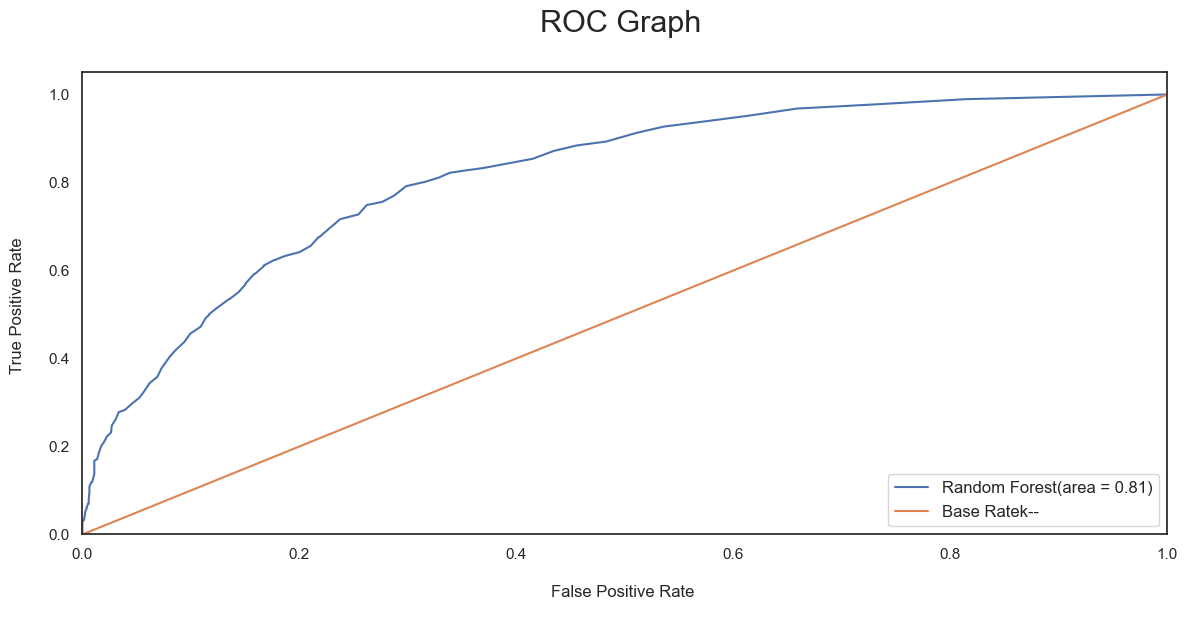

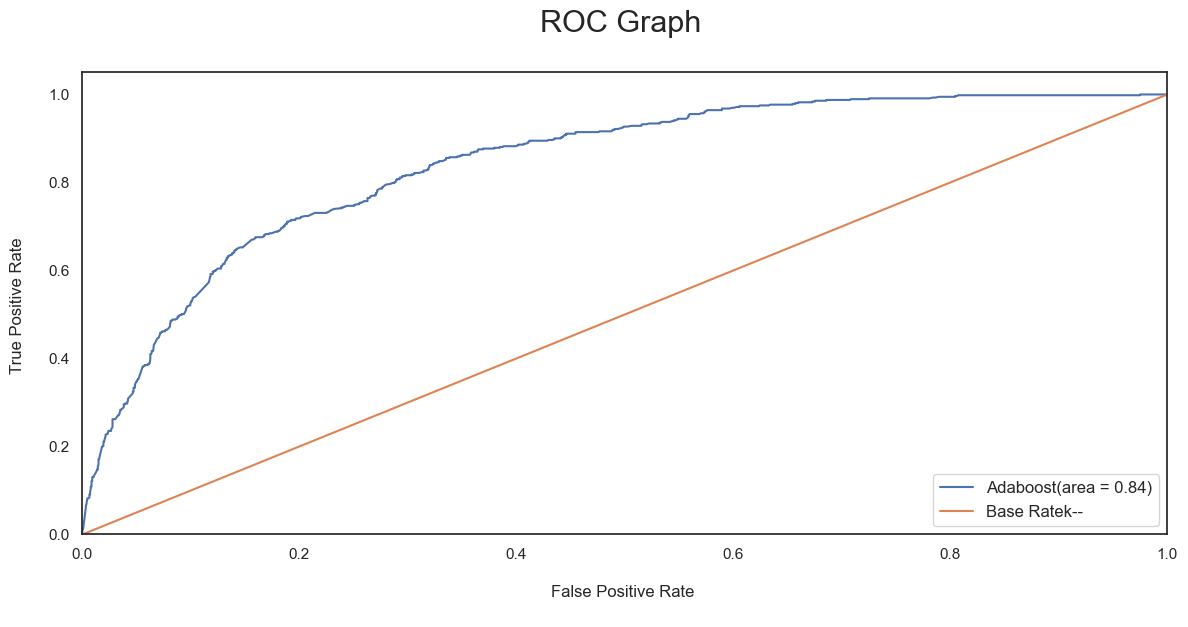

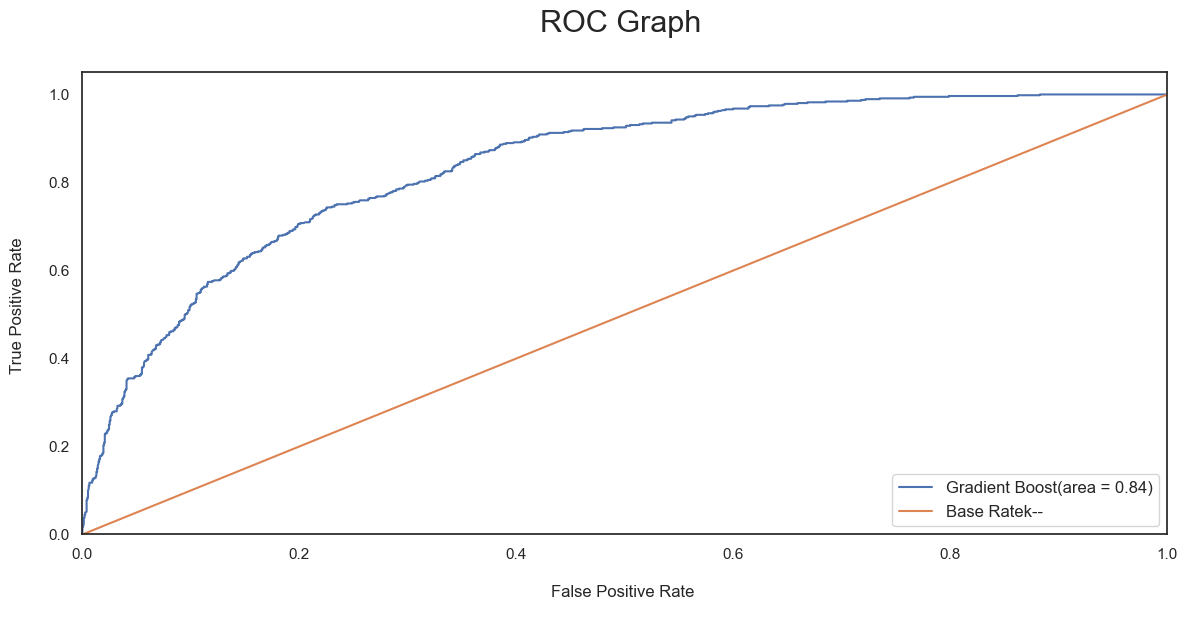

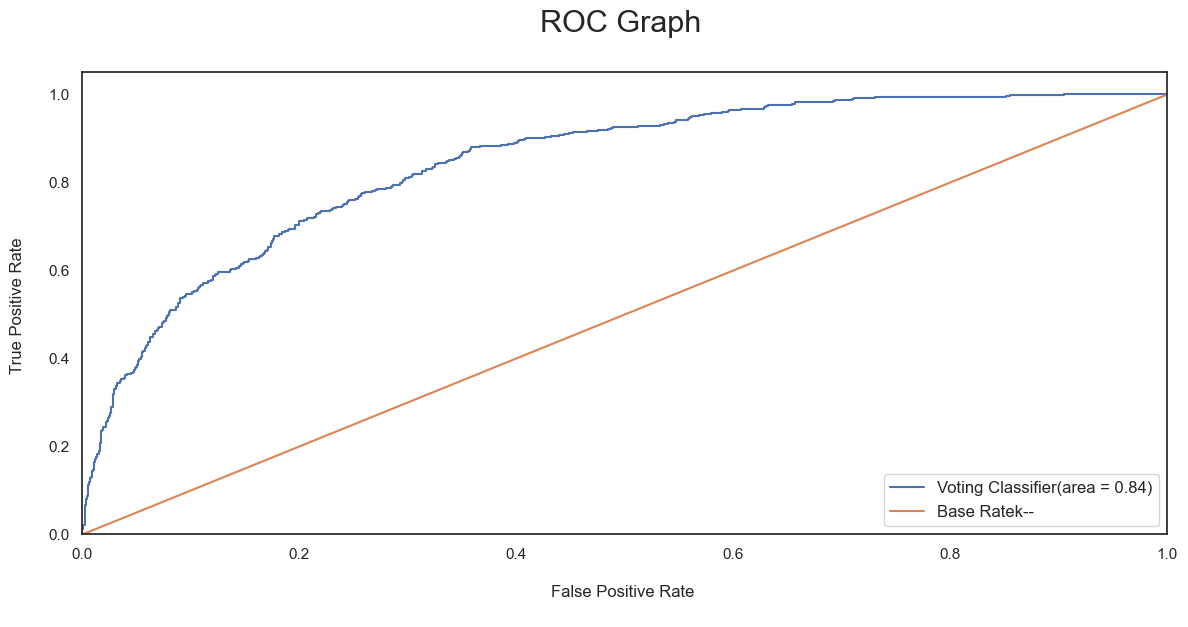

In [250]:
preds = [y_pred, y_pred3,  y_pred5, y_pred6, y_pred7,
              y_pred8, y_pred9, y_pred10]
classifiers = [classifier , classifier3, classifier5, classifier6, classifier7,
             classifier8, classifier9, classifier10]
model_names_ = ["Logistic Regression",  "K-Nearest Neighbours","Naive Bayes",
               "Decision Tree", "Random Forest", "Adaboost", "Gradient Boost",  "Voting Classifier"]

for i, j, k in zip(classifiers, model_names_, predictions):
    ROC_curve(i, j, k) 

In [264]:
# Cross validation

from sklearn.model_selection import cross_val_score

# Function that will track the mean value and the standard deviation of the accuracy
def cvDictGen(functions, scr, X_train = X, y_train = y, cv = 5):
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv = cv, scoring = scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict

In [266]:
cvD = cvDictGen(classifiers, scr = 'roc_auc')
cvD

{'LogisticRegression': [0.8341453245648708, 0.011234456051251703],
 'KNeighborsClassifier': [0.7897990631635257, 0.008052627071194038],
 'GaussianNB': [0.8235867325646383, 0.009128691519254805],
 'DecisionTreeClassifier': [0.6495716942485583, 0.013648869364097423],
 'RandomForestClassifier': [0.8181588144809258, 0.016324377523239134],
 'AdaBoostClassifier': [0.841130643812136, 0.01265082540562278],
 'GradientBoostingClassifier': [0.8416329421033364, 0.012460457281405254],
 'VotingClassifier': [0.8423413557452994, 0.012220191280147804]}

## Predicting feature importance

In [269]:
# Gradient Boost
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier9.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

features      coef
2           Contract  0.429858
3     MonthlyCharges  0.172462
7             tenure  0.151234
4       TotalCharges  0.124064
5        TechSupport  0.071587
9      PaymentMethod  0.016321
6    InternetService  0.013646
8   PaperlessBilling  0.011563
0                age  0.007287
1             gender  0.001978
10             Churn       NaN

In [271]:
# Ada boost classifier
feature_importances = pd.concat([pd.DataFrame(data.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier8.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

features  coef
4       TotalCharges  0.36
3     MonthlyCharges  0.16
7             tenure  0.16
2           Contract  0.12
0                age  0.06
9      PaymentMethod  0.06
6    InternetService  0.04
5        TechSupport  0.02
8   PaperlessBilling  0.02
1             gender  0.00
10             Churn   NaN

## Hyper Parameter tuning

## Using Randomized search CV

In [275]:
#Ada boost

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
adaHyperParams = {'n_estimators': [10,50,100,200,420], "learning_rate":  [0.001, 0.01, 0.1, 0.3]}
gridSearchAda = RandomizedSearchCV(estimator = classifier8, param_distributions = adaHyperParams, n_iter = 5,
                                   scoring = 'roc_auc') # other option accuracy
gridSearchAda.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(), n_iter=5,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.3],
                                        'n_estimators': [10, 50, 100, 200,
                                                         420]},
                   scoring='roc_auc')

In [277]:
gridSearchAda.best_params_, gridSearchAda.best_score_

({'n_estimators': 50, 'learning_rate': 0.3}, 0.8417793810445231)

In [279]:
bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train, y_train)

In [281]:
# Getting the score AdaBoost
test_labels = bestAdaModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8419065143517351

### Gradient Boost

In [284]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}
# Initialization
gridSearchGB = RandomizedSearchCV(estimator = classifier9, param_distributions = gbHyperParams, n_iter = 10,
                                   scoring = 'roc_auc')
# Fitting the model
gridSearchGB.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000223354C9340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022331CBC2F0>},
                   scoring='roc_auc')

In [286]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 4, 'n_estimators': 189},
 0.8351779524268039)

In [288]:
bestGBModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [290]:
# Getting the score AdaBoost
test_labels_GB = bestGBModFitted.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels_GB , average = 'macro', sample_weight = None)

0.8316762352572933

## Using Grid SearchCV

In [293]:
ABC = AdaBoostClassifier()

ABC_param_grid = {"n_estimators" :[10,50,100,200,420],
                  "learning_rate":  [0.001, 0.01, 0.1, 0.3]}

gsABC = GridSearchCV(ABC, param_grid = ABC_param_grid, cv = 10, scoring = "roc_auc", n_jobs = 6, verbose = 1)

gsABC.fit(X_train,y_train)

ada_best = gsABC.best_estimator_
print(ada_best)
print(gsABC.best_score_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
AdaBoostClassifier(learning_rate=0.1, n_estimators=200)
0.8440548164310735


In [295]:
bestAdaModFitted2 = gsABC.best_estimator_.fit(X_train, y_train)

In [297]:
test_labels = bestAdaModFitted2.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average = 'macro', sample_weight = None)

0.8431291995640912